In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer

---

## Data Preprocessing



### Step 1: Read the `loan.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = '/Users/celinakamler/ucb/homework/Project-4/loan.csv'
loan_data = pd.read_csv(file_path)

# Review the DataFrame
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Preprocessing data
# Drop Loan_ID
loan_data_df = loan_data.drop(['Loan_ID'], axis =1)

In [4]:
#Impute missing values for continuous data only (LoanAmount, Loan_Amount_Term)
continuous_columns = ['LoanAmount', 'Loan_Amount_Term']
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the relevant columns
loan_data_df[continuous_columns] = imputer.fit_transform(loan_data_df[continuous_columns])

# Check the results
print(loan_data_df[continuous_columns].head())

   LoanAmount  Loan_Amount_Term
0       109.6             360.0
1       128.0             360.0
2        66.0             360.0
3       120.0             360.0
4       141.0             360.0


In [5]:
# Drop missing categorical values
loan_data_df.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,109.6,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
#Check datatypes for all variables
loan_data_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Determine the number of unique values in each column
loan_data_df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           206
Loan_Amount_Term      16
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

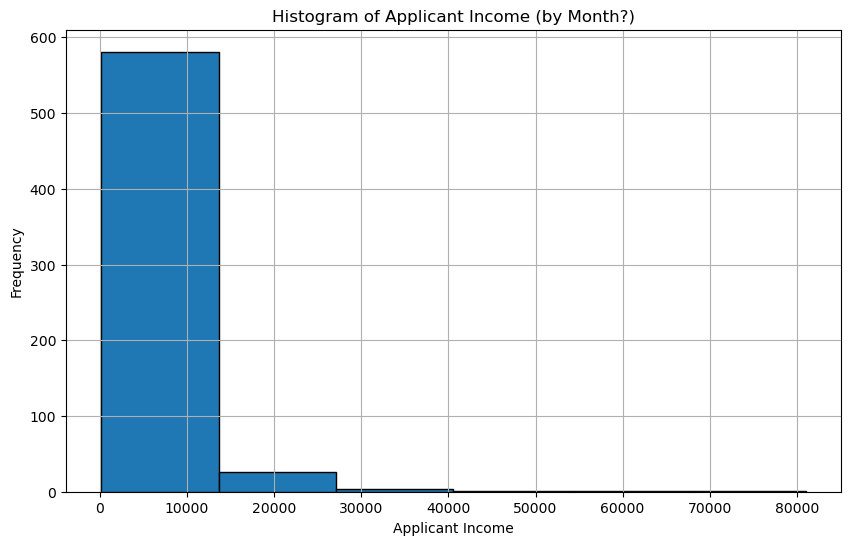

In [26]:
# Examine histogram of 'ApplicantIncome' to inform bins
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(loan_data_df['ApplicantIncome'], bins=6, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income (by Month?)')
plt.grid(True)
plt.show()

In [33]:
# For columns with more than 10 unique values use pd.cut to create bins, statring with ApplicantIncome, CoapplicantIncome, and Loan_Amount_Term
# Manually define unique bin edges
applicant_income_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, np.inf]  # Define edges for ApplicantIncome
coapplicant_income_bins = [-np.inf, 0, 1000, 3000, 5000, np.inf]  # Define edges for CoapplicantIncome including zero

# Apply pd.cut with manually defined bin edges
loan_data_df['ApplicantIncome_bins'] = pd.cut(loan_data_df['ApplicantIncome'], bins=applicant_income_bins, labels=False)
loan_data_df['CoapplicantIncome_bins'] = pd.cut(loan_data_df['CoapplicantIncome'], bins=coapplicant_income_bins, labels=False)

loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_bins,CoapplicantIncome_bins,LoanAmount_bins
0,Male,No,0,Graduate,No,5849,0.0,109.6,360,1.0,Urban,Y,5,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,4,2,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y,2,0,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y,2,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360,1.0,Rural,Y,2,0,0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1.0,Rural,Y,4,0,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360,1.0,Urban,Y,6,1,3
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360,1.0,Urban,Y,6,0,2


/Users/celinakamler/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6890: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


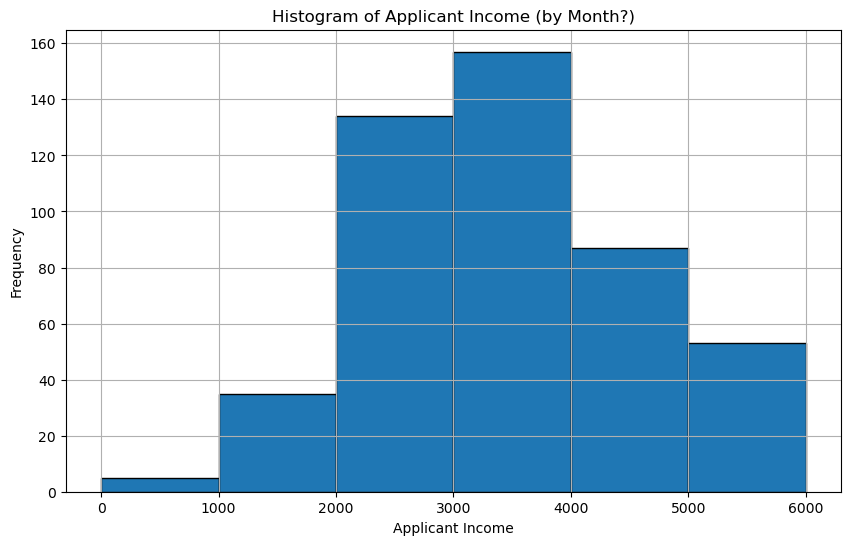

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data_df['ApplicantIncome'], bins=applicant_income_bins, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income (by Month?)')
plt.grid(True)
plt.show()

In [35]:
# Use more bins for 'LoanAmount' to allow for a more complex model
num_bins = 10

# Create bins using pd.cut for fixed-width bins
loan_data_df['LoanAmount_bins'] = pd.cut(loan_data_df['LoanAmount'], bins=num_bins, labels=False)

In [36]:
# Convert Loan_Amount_Term to integer
loan_data_df['Loan_Amount_Term'] = loan_data_df['Loan_Amount_Term'].astype(int)
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_bins,CoapplicantIncome_bins,LoanAmount_bins
0,Male,No,0,Graduate,No,5849,0.0,109.6,360,1.0,Urban,Y,5,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,4,2,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y,2,0,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y,2,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360,1.0,Rural,Y,2,0,0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1.0,Rural,Y,4,0,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360,1.0,Urban,Y,6,1,3
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360,1.0,Urban,Y,6,0,2


In [37]:
# Check the number of unique values in each column
loan_data_df.nunique()

Gender                      2
Married                     2
Dependents                  4
Education                   2
Self_Employed               2
ApplicantIncome           505
CoapplicantIncome         287
LoanAmount                206
Loan_Amount_Term           16
Credit_History              2
Property_Area               3
Loan_Status                 2
ApplicantIncome_bins        7
CoapplicantIncome_bins      5
LoanAmount_bins            10
dtype: int64

In [38]:
# Ensure binned columns are treated as categorical
loan_data_df['ApplicantIncome_bins'] = loan_data_df['ApplicantIncome_bins'].astype('category')
loan_data_df['CoapplicantIncome_bins'] = loan_data_df['CoapplicantIncome_bins'].astype('category')

# Check the data types to confirm
print(loan_data_df[['ApplicantIncome_bins', 'CoapplicantIncome_bins']].dtypes)

ApplicantIncome_bins      category
CoapplicantIncome_bins    category
dtype: object


In [39]:
# Change all categorical columns to binary using get dummies
cat_loan_df = pd.get_dummies(loan_data_df, columns=['Gender','Married','Dependents','Education',
                                                    'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area'])

In [40]:
# Separate the target column 'Loan_Status'
y = cat_loan_df.Loan_Status.values

# Drop the target column 'Loan_Status' from the features data
X = cat_loan_df.drop(columns="Loan_Status").values

# Check the results
cat_loan_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,ApplicantIncome_bins,CoapplicantIncome_bins,LoanAmount_bins,Gender_Female,Gender_Male,Married_No,...,Loan_Amount_Term_324,Loan_Amount_Term_348,Loan_Amount_Term_360,Loan_Amount_Term_384,Loan_Amount_Term_480,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,109.6,Y,5,0,1,False,True,True,...,False,False,True,False,False,False,True,False,False,True
1,4583,1508.0,128.0,N,4,2,1,False,True,False,...,False,False,True,False,False,False,True,True,False,False
2,3000,0.0,66.0,Y,2,0,0,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,2583,2358.0,120.0,Y,2,2,1,False,True,False,...,False,False,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,Y,5,0,1,False,True,True,...,False,False,True,False,False,False,True,False,False,True


In [41]:
#Split the Data into Training and Testing Sets
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [ ]:
# Separate the data into labels and features
# Separate the y variable, the labels


# Separate the X variable, the features


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Split the data using train_test_split
# We'll use 80% of the data for training and 20% for testing
# Assign a random_state of 1 to ensure reproducibility



---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

### Step 4: Answer the following question.

---